C:\Users\deonp\AppData\Local\Temp\ipykernel_1740\678572527.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('snaggr_file_no_priceline.csv', index_col=0)


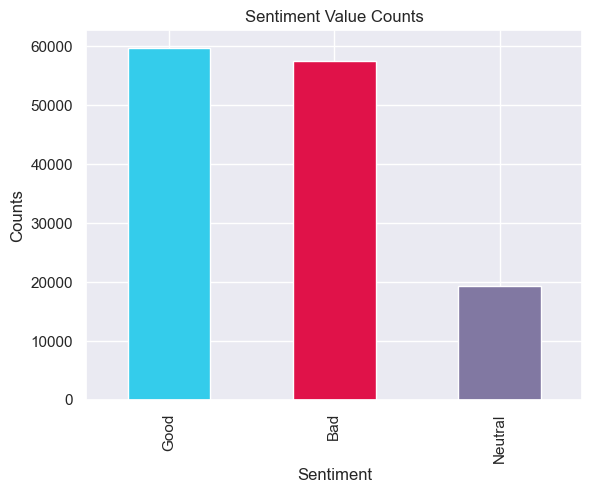

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
df = pd.read_csv('snaggr_file_no_priceline.csv', index_col=0)
df.dropna(inplace=True)
# Get the value counts of each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Plot a bar graph
sentiment_counts.plot(kind='bar', color=['#34cceb', '#e01249', '#8178a2'])

# Add title and labels
plt.title('Sentiment Value Counts')
plt.xlabel('Sentiment')
plt.ylabel('Counts')

# Show the plot
plt.show()

C:\Users\deonp\AppData\Local\Temp\ipykernel_1740\2900154986.py:16: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('snaggr_file_no_priceline.csv', index_col=0)


Epoch 1/100
1969/1969 [==============================] - 90s 44ms/step - loss: 0.7672 - accuracy: 0.7586 - val_loss: 0.5836 - val_accuracy: 0.7938
Epoch 2/100
1969/1969 [==============================] - 91s 46ms/step - loss: 0.5777 - accuracy: 0.7968 - val_loss: 0.5853 - val_accuracy: 0.7956
Epoch 3/100
1969/1969 [==============================] - 95s 48ms/step - loss: 0.5594 - accuracy: 0.7993 - val_loss: 0.5884 - val_accuracy: 0.7925
Epoch 4/100
1969/1969 [==============================] - 97s 49ms/step - loss: 0.5468 - accuracy: 0.8015 - val_loss: 0.5440 - val_accuracy: 0.7990
Epoch 5/100
1969/1969 [==============================] - 97s 49ms/step - loss: 0.5346 - accuracy: 0.8025 - val_loss: 0.5465 - val_accuracy: 0.8010
Epoch 6/100
1969/1969 [==============================] - 94s 48ms/step - loss: 0.5252 - accuracy: 0.8069 - val_loss: 0.5452 - val_accuracy: 0.7990
Epoch 7/100
1969/1969 [==============================] - 94s 48ms/step - loss: 0.5152 - accuracy: 0.8110 - val_loss: 0

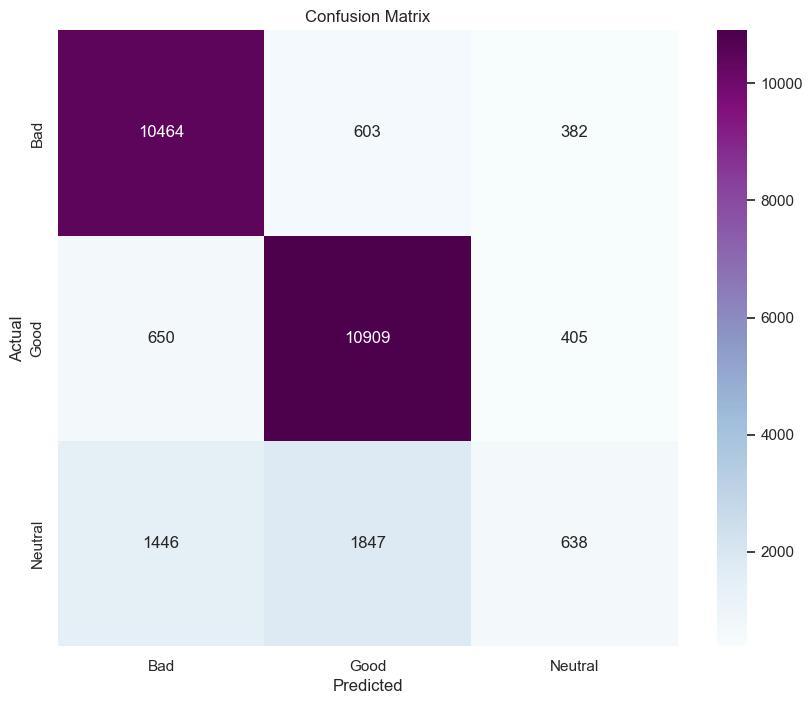

Accuracy: 0.8049663545933294
Classification Report:
               precision    recall  f1-score   support

         Bad       0.83      0.91      0.87     11449
        Good       0.82      0.91      0.86     11964
     Neutral       0.45      0.16      0.24      3931

    accuracy                           0.80     27344
   macro avg       0.70      0.66      0.66     27344
weighted avg       0.77      0.80      0.78     27344



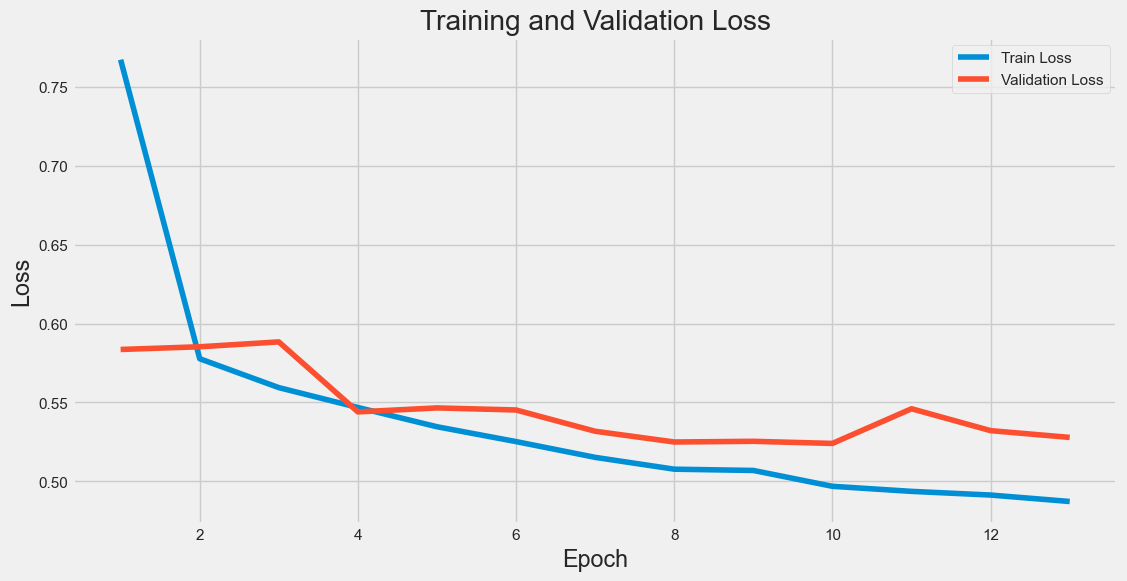

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences, to_categorical
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load the data
df = pd.read_csv('snaggr_file_no_priceline.csv', index_col=0)
df.dropna(inplace=True)

# Tokenize the review texts
tokenizer = Tokenizer(num_words=5000)  # Adjust num_words based on your data
tokenizer.fit_on_texts(df['reviews'])
X = tokenizer.texts_to_sequences(df['reviews'])

# Pad the sequences
X = pad_sequences(X, maxlen=100)  # Adjust maxlen based on your data

# Encode the labels
y = pd.get_dummies(df['sentiment']).values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# Define the RNN model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=50, input_length=100))  # Adjust input_dim, output_dim, and input_length based on your data
model.add(LSTM(units=50, dropout=0.2, kernel_regularizer=l2(0.01), recurrent_dropout=0.2))
model.add(Dense(50, activation='relu', kernel_regularizer=l2(0.01)))  
model.add(Dense(3, activation='softmax', kernel_regularizer=l2(0.01)))  

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=50, validation_split=0.1, callbacks=[early_stopping], verbose=1)

# Predict the sentiments for the test data
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

# Map the integer labels back to original string labels
label_map = {0: 'Bad', 1: 'Good', 2: 'Neutral'}
y_test_labels = [label_map[label] for label in y_test_classes]
y_pred_labels = [label_map[label] for label in y_pred_classes]

# Generate confusion matrix
conf_mat = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='BuPu', xticklabels=['Bad', 'Good', 'Neutral'], yticklabels=['Bad', 'Good', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy:", accuracy_score(y_test_classes, y_pred_classes))
print("Classification Report:\n", classification_report(y_test_labels, y_pred_labels, target_names=['Bad', 'Good', 'Neutral']))




train_loss = history.history['loss']
val_loss = history.history['val_loss'] 
loss_df = pd.DataFrame({'train_loss' : train_loss, 'val_loss' : val_loss})
epoch = range(1, len(train_loss) + 1)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 6))

# Plot using Seaborn
sns.lineplot(data=loss_df, x=epoch, y=train_loss, label='Train Loss')
sns.lineplot(data=loss_df, x=epoch, y=val_loss, label='Validation Loss')

# Set plot title and labels
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Display the plot
plt.legend()
plt.show()

# Save the model
model.save('snaggr_3class_rnn_model.h5')

C:\Users\deonp\AppData\Local\Temp\ipykernel_1740\886535020.py:16: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('snaggr_file_no_priceline.csv', index_col=0)


Epoch 1/10
1539/1539 [==============================] - 135s 86ms/step - loss: 0.4639 - accuracy: 0.8448 - val_loss: 0.3569 - val_accuracy: 0.8724
Epoch 2/10
1539/1539 [==============================] - 141s 91ms/step - loss: 0.3352 - accuracy: 0.8781 - val_loss: 0.3291 - val_accuracy: 0.8773
Epoch 3/10
1539/1539 [==============================] - 139s 91ms/step - loss: 0.3182 - accuracy: 0.8815 - val_loss: 0.3241 - val_accuracy: 0.8772
Epoch 4/10
1539/1539 [==============================] - 138s 90ms/step - loss: 0.3080 - accuracy: 0.8854 - val_loss: 0.3220 - val_accuracy: 0.8760
Epoch 5/10
1539/1539 [==============================] - 144s 94ms/step - loss: 0.3010 - accuracy: 0.8867 - val_loss: 0.3153 - val_accuracy: 0.8743
Epoch 6/10
1539/1539 [==============================] - 154s 100ms/step - loss: 0.2972 - accuracy: 0.8884 - val_loss: 0.3189 - val_accuracy: 0.8780
Epoch 7/10
1539/1539 [==============================] - 147s 95ms/step - loss: 0.2914 - accuracy: 0.8905 - val_loss: 

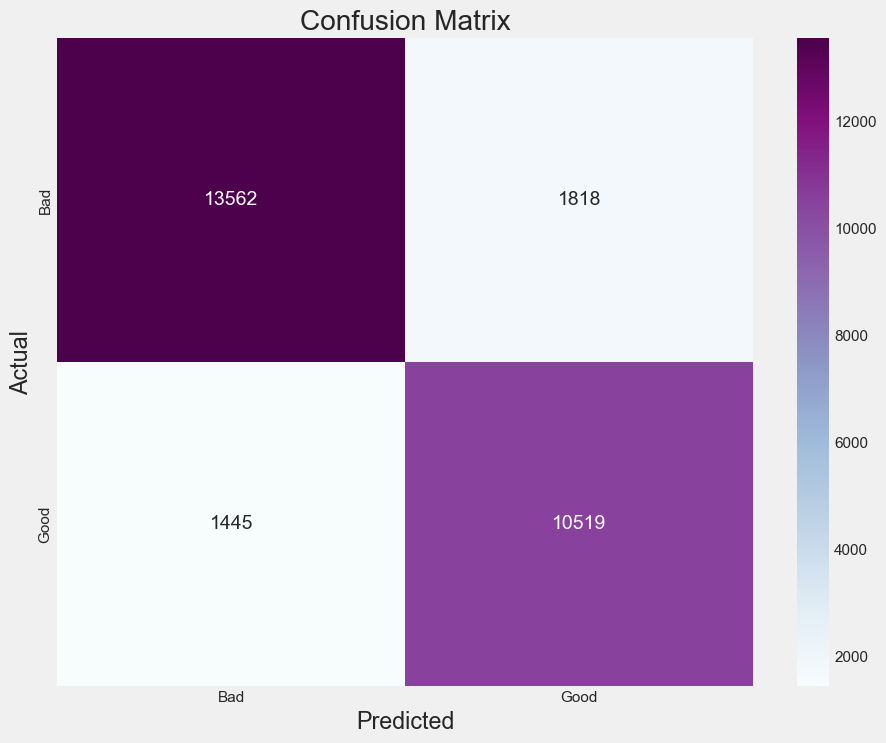

Accuracy: 0.8806685196021065
Classification Report:
               precision    recall  f1-score   support

         Bad       0.90      0.88      0.89     15380
        Good       0.85      0.88      0.87     11964

    accuracy                           0.88     27344
   macro avg       0.88      0.88      0.88     27344
weighted avg       0.88      0.88      0.88     27344



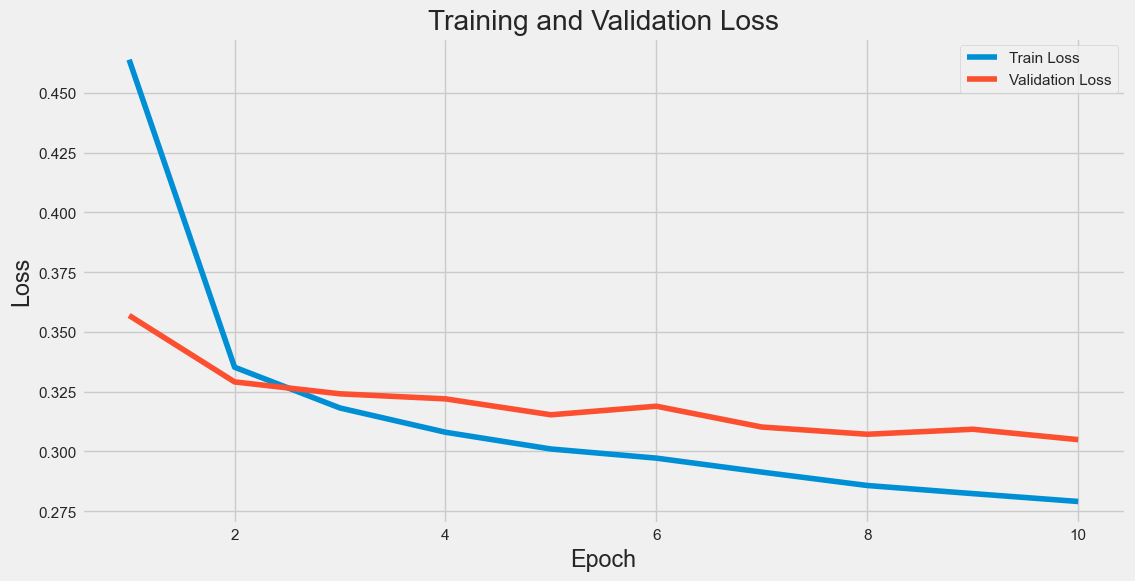

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences, to_categorical
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load the data
df = pd.read_csv('snaggr_file_no_priceline.csv', index_col=0)
df.dropna(inplace=True)

# Replace 'Neutral' with 'Bad'
df.loc[df['sentiment'] == 'Neutral', 'sentiment'] = 'Bad'

# Tokenize the review texts
tokenizer = Tokenizer(num_words=5000)  # Adjust num_words based on your data
tokenizer.fit_on_texts(df['reviews'])
X = tokenizer.texts_to_sequences(df['reviews'])

# Pad the sequences
X = pad_sequences(X, maxlen=100)  # Adjust maxlen based on your data

# Encode the labels
y = pd.get_dummies(df['sentiment']).values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the RNN model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64, input_length=100))  # Adjust input_dim, output_dim, and input_length based on your data
model.add(LSTM(units=64, dropout=0.2, kernel_regularizer=l2(0.01), recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax', kernel_regularizer=l2(0.01)))  

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
# Control when the model stops training
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1, callbacks=[early_stopping], verbose=1)

# Predict the sentiments for the test data
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)
# <---------------------------------------------------------END OF TRAIN/TEST CODE-------------------------------------------->



# Map the integer labels back to original string labels
label_map = {0: 'Bad', 1: 'Good'}
y_test_labels = [label_map[label] for label in y_test_classes]
y_pred_labels = [label_map[label] for label in y_pred_classes]
# Generate confusion matrix
conf_mat = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='BuPu', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy:", accuracy_score(y_test_classes, y_pred_classes))
print("Classification Report:\n", classification_report(y_test_labels, y_pred_labels))


train_loss = history.history['loss']
val_loss = history.history['val_loss'] 
loss_df = pd.DataFrame({'train_loss' : train_loss, 'val_loss' : val_loss})
epoch = range(1, len(train_loss) + 1)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 6))

# Plot using Seaborn
sns.lineplot(data=loss_df, x=epoch, y=train_loss, label='Train Loss')
sns.lineplot(data=loss_df, x=epoch, y=val_loss, label='Validation Loss')

# Set plot title and labels
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Display the plot
plt.legend()
plt.show()

model.save('snaggr_2class_rnn_model.h5')